In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cProfile

## Create dataset

In [40]:
g = RandGraph(actors=10000, moving=10, n_paths=10)

In [41]:
data, nodes = g.step(n=300)

% 100 ||||||||||

In [42]:
cProfile.run('g.step(n=300)')

% 100 ||||||||||         10298873 function calls in 5.073 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.073    5.073 <string>:1(<module>)
      600    0.001    0.000    0.001    0.000 _weakrefset.py:70(__contains__)
      600    0.001    0.000    0.002    0.000 abc.py:178(__instancecheck__)
    16581    0.003    0.000    0.003    0.000 coreviews.py:45(__init__)
     9163    0.003    0.000    0.004    0.000 coreviews.py:51(__iter__)
     9163    0.005    0.000    0.007    0.000 coreviews.py:81(__getitem__)
     3709    0.000    0.000    0.000    0.000 digraph.py:1060(is_directed)
     3709    0.002    0.000    0.002    0.000 digraph.py:336(succ)
     3709    0.003    0.000    0.004    0.000 digraph.py:357(pred)
     4240    0.008    0.000    0.013    0.000 function.py:573(set_node_attributes)
     3709    0.003    0.000    0.067    0.000 generic.py:46(shortest_path)
     7418    0.002    0.

In [34]:
df = pd.DataFrame(data, columns=nodes)

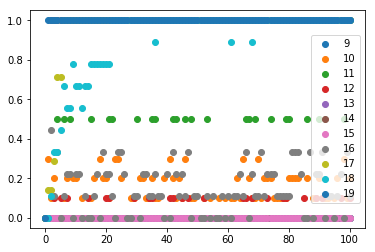

In [35]:
df.plot(kind='line', style='o', )
plt.show()

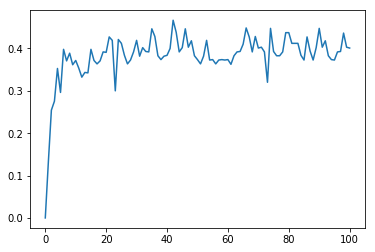

In [36]:
df.mean(axis=1).plot(kind='line')
plt.show()

In [37]:
df['congested'] = np.count_nonzero(df.as_matrix().astype(int), axis=1)

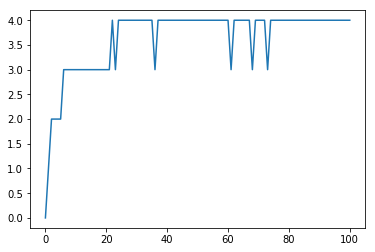

In [38]:
df.congested.plot(kind='line')
plt.show()

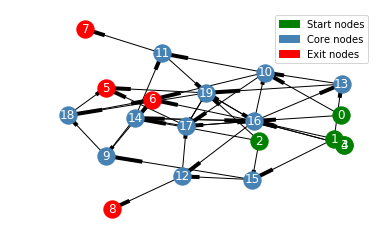

In [39]:
g.plot()

## Run simulations
grid search:
* moving actors : 2 - 20
* paths : 5 - 50
* entry nodes : 2 - 10 
* exit nodes : 2 - 10
* core nodes : 5 - 50

In [43]:
moving_actors = list(range(2,20,2))
paths = list(range(5,50,5))
entry_nodes = list(range(2,10,2))
exit_nodes = list(range(2,10,2))
core_nodes = list(range(5,50,5))

In [45]:
from itertools import product

In [48]:
len(list(product(moving_actors, paths, entry_nodes, exit_nodes, core_nodes)))

11664

In [49]:
moving_actors = [2,20]
paths = [4,50]
entry_nodes = [2,10]
exit_nodes = [2,10]
core_nodes = [5,50]

In [50]:
len(list(product(moving_actors, paths, entry_nodes, exit_nodes, core_nodes)))

32

In [52]:
results = pd.DataFrame()
i = 0
for ma,p,en,ex,cn in product(moving_actors, paths, entry_nodes, exit_nodes, core_nodes):
    g = RandGraph(actors=10000, moving=ma, n_paths=p, n_entry_nodes=en, n_exit_nodes=ex, n_core_nodes=cn)
    data, nodes = g.step(n=100)
    df = pd.DataFrame(data, columns=nodes)
    results[i] = df.mean(axis=1)
    i += 1

% 99 ||||||||||

In [53]:
results.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.066667,0.010000,0.400000,0.000,0.222222,0.008667,0.122222,0.009524,0.050,0.002,...,0.28,0.054000,0.2,0.040000,0.36,0.032857,0.325000,0.090937,0.622222,0.084143
2,0.025000,0.005000,0.000000,0.000,0.130000,0.009833,0.086667,0.018167,0.025,0.002,...,0.40,0.092333,0.2,0.033333,0.36,0.052381,0.250000,0.071937,0.677778,0.132381
3,0.066667,0.002000,0.200000,0.005,0.244444,0.023667,0.104444,0.017357,0.000,0.002,...,0.64,0.110762,0.2,0.031667,0.20,0.051746,0.421429,0.096048,0.511111,0.133881
4,0.091667,0.004222,0.233333,0.014,0.372222,0.015167,0.141587,0.028167,0.000,0.000,...,0.68,0.125595,0.2,0.040000,0.36,0.071111,0.271429,0.104159,0.588889,0.128405


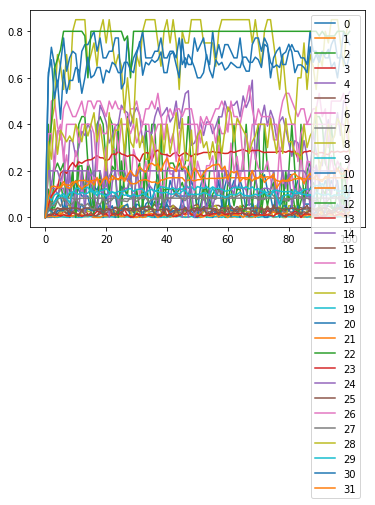

In [54]:
results.plot(kind='line')
plt.show()